# Didymos brightness before and after Dart Impact on Dimorphos


In [13]:
from astropy.table import Table
from astroquery.jplhorizons import Horizons

from astropy.time import Time
import matplotlib.dates as mdates
from matplotlib import rc
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
import numpy as np

"""
    input such as: 2021-Jan-01 00:00 
    returns        2021-01-01 00:00:00.000
    which can be input to astropy.time.Time iso
    to plot dates with matplotlib 
"""
def getDateTimeUTHorizons(datestr):
    yyyy = datestr[0:4]
    mm = datestr[5:8]
    if (mm == 'Jan'):
        mm = '01'
    if (mm == 'Feb'):
        mm = '02'
    if (mm == 'Mar'):
        mm = '03'
    if (mm == 'Apr'):
        mm = '04'
    if (mm == 'May'):
        mm = '05'
    if (mm == 'Jun'):
        mm = '06'
    if (mm == 'Jul'):
        mm = '07'
    if (mm == 'Aug'):
        mm = '08'
    if (mm == 'Sep'):
        mm = '09'
    if (mm == 'Oct'):
        mm = '10'
    if (mm == 'Nov'):
        mm = '11'
    if (mm == 'Dec'):
        mm = '12'
    dd = datestr[9:11]
    s = yyyy + '-' + mm + '-' + dd
    hrs = datestr[12:14]
    mins = datestr[15:17]
    s = s + ' ' + hrs + ':' + mins +":00.000"
    return s

def getDateTimeUT(dateOfObservation):
    yyyy = dateOfObservation[0:4]
    mm = dateOfObservation[5:7]
    dd = dateOfObservation[8:10]
    s = yyyy + '-' + mm + '-' + dd
    ff = float(dateOfObservation[10: ])
    seconds = int(ff * 86400)
    hrs = int(seconds/3600)
    mins = int((seconds - hrs * 3600)/60)
    secs = seconds  - hrs * 3600 - mins * 60
    s = s + ' '
    if (hrs < 10):
        s = s + "0"
    s = s + str(hrs) + ":"
    if (mins < 10):
        s = s + "0"
    s = s + str(mins) + ":"
    if (secs < 10):
        s = s + "0"
    s = s + str(secs)
    return s

warnings.filterwarnings("ignore")


In [14]:
desig = 65803
# (65803) Didymos
# from JPL Horizons DART (spacecraft) ephemeris results - see text info in header
#2022-09-01 22:49:49 2022-11-26 15:39:36

# Impact: 26-Sep-2022 23:14:18.1108 UTC
impactDateTime = Time('2022-09-26 23:14:18.1108', format='iso').datetime

mpcdates = []
Nmpcdates = []
Tmpcdates = []
rmpcdates = []
Bmpcdates = []
Rmpcdates = []
gmpcdates = []
Gmpcdates = []
Vmpcdates = []
Impcdates = []
ompcdates = []
cmpcdates = []
wmpcdates = []
impcdates = []
zmpcdates = []
Cmpcdates = []
nonempcdates = []

mags = []
Nmags = []
Tmags = []
rmags = []
Bmags = []
Rmags = []
gmags = []
Gmags = []
Vmags = []
Imags = []
omags = []
cmags = []
wmags = []
imags = []
zmags = []
Cmags = []
nonemags = []
magbands = []
observedbands = []
observedcatalogs = []
ccdtotaldates = []
ccdtotalmags = []
ccdnucleardates = []
ccdnuclearmags = []

satelliteObs = 0
numobs = 0


In [15]:
desig = '65803'
fullname ='(65803) Didymos'
prefix = '(65803) Didymos'
mpcfilename= '65803-Sep2022'


In [16]:
start = '2022-Sep-01'
stop =  '2022-Dec-01'
obj = Horizons(id=desig, location='500',epochs={'start':'2022-09-01', 'stop':'2022-12-01','step':'1 D'} )

eph = obj.ephemerides()
eph.write(desig + '-ephem.fits', format='fits', overwrite=True )


In [17]:
eph = Table.read(desig+ '-ephem.fits')
# print(eph.columns)
objectname = eph.columns[eph.index_column('targetname')]
datetimestr = eph.columns[eph.index_column('datetime_str')]
jdvals = eph.columns[eph.index_column('datetime_jd')]
rhvals = eph.columns[eph.index_column('r')]
ravals = eph.columns[eph.index_column('RA')]
decvals = eph.columns[eph.index_column('DEC')]
deltavals = eph.columns[eph.index_column('delta')]
magvals = eph.columns[eph.index_column('V')]
phasevals = eph.columns[eph.index_column('alpha')]
elong = eph.columns[eph.index_column('elong')]


In [18]:
# From Fink tutorial - Phase curve
# https://github.com/astrolabsoftware/fink-tutorials/blob/main/sso/fink_sso_imcce.ipynb
# V_minus_g = -0.32 ==> g = V + 0.32
# V_minus_r =  0.13 ==> r = V - 0.13
g = magvals + 0.32 
r = magvals - 0.13
# From ATLAS: A High-cadence All-sky Survey System
# Tonry, J. L. ; Denneau, L. ; Heinze, A. N. ; Stalder, B. ; Smith, 
# K. W. ; Smartt, S. J. ; Stubbs, C. W. ;
# Weiland, H. J. ; Rest, A.
# https://arxiv.org/pdf/1802.00879.pdf


#  c ~ 0.49 g + 0.51 r 
#  o ~ 0.55 r + 0.45 i
c = 0.49 * g + 0.51 *r
# o = c - 0.73
# (c - o) ~ 0.73 

#  g + r = 2.02 c - 0.02 o
#  0.02 o = 2.02 c - g - r
# o = 50* (2.02 c - g - r)

o = 50* (2.02 * c - g - r)


In [19]:
datetimes = []
for datestr in datetimestr:
    datetimeUT = getDateTimeUTHorizons(datestr)
    dateTime = Time(datetimeUT, format='iso').datetime
    datetimes.append(dateTime)

codes=[]
jdobs=[]


title = fullname+ ' - ATLAS Magnitudes from MPC Observation Database ' + start +  ' to ' + stop
figfile =  prefix + '-MPC-mags.png'

f = open(mpcfilename + '.txt', 'r')

for lines in f:
    packed = lines[0:12].strip()
    orbitType = lines[4:5].strip()
    typeOfObservation = lines[14:15].strip()
    # print(lines)
    year = int(lines[15:19])
    code = lines[77:80]
    magnitudeBand = lines[70:71].strip()

    # Satellite observations filtered out
    if (typeOfObservation == 'S'): 
        satelliteObs = satelliteObs + 1
        numobs = numobs + 1

    # if ((typeOfObservation != 's') and (typeOfObservation != 'S') ):
    
    # there are several ATLAS station codes
    # M22  20.81059 0.845564 -0.532612 ATLAS South Africa, Sutherland
    # T05 203.74299 0.936235 +0.351547 ATLAS-HKO, Haleakala
    # T07 204.42387 0.943290 +0.332467 ATLAS-MLO Auxiliary Camera, Mauna Loa
    # T08 204.42395 0.943290 +0.332467 ATLAS-MLO, Mauna Loa
    # W68 289.23502 0.862845 -0.504269 ATLAS Chile, Rio Hurtado
    # if ((typeOfObservation != 's') and (typeOfObservation != 'S') and ((code == 'T05') 
    # or (code == 'M22')or (code == 'T05')or (code == 'T08') or (code == 'W68') )):        

    # ATLAS observations use o or c magnitude bands (orange or cyan)
    if ((typeOfObservation != 's') and (typeOfObservation != 'S') and ((magnitudeBand == 'o') or (magnitudeBand == 'c') )):        
        numobs = numobs + 1
        # print(code)
        dateOfObservation = lines[15:32].strip()
        codes.append(code)
        #print('dateOfObservation', dateOfObservation)
        datetimeUT = getDateTimeUT(dateOfObservation)
        #print('datetimeUT', datetimeUT)
        dt = Time(datetimeUT, format='iso').datetime
        jdobs.append(Time(datetimeUT, format='iso').jd)
        #print('dt', dt)
        #mpcdates.append(dt)
        observedRA = lines[32:44].strip()
        observedDecl = lines[44:56].strip()
        observedMagnitude = lines[65:70].strip(' ')
        #observedMagnitude = lines[65:70]
        #print('observedMagnitude', observedMagnitude)
        magnitudeBand = lines[70:71].strip()
        magbands.append(magnitudeBand)
        if (magnitudeBand not in observedbands):
            observedbands.append(magnitudeBand)
            # print('magnitudeBand', magnitudeBand)
        if   ((len(observedMagnitude) > 0) and (magnitudeBand == "N")):
            Nmpcdates.append(dt)
            Nmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "T")):
            Tmpcdates.append(dt)
            Tmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "B")):
            Bmpcdates.append(dt)
            Bmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "R")):
            Rmpcdates.append(dt)
            Rmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "r")):
            rmpcdates.append(dt)
            rmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "V")):
            Vmpcdates.append(dt)
            Vmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "G")):
            Gmpcdates.append(dt)
            Gmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "g")):
            gmpcdates.append(dt)
            gmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "o")):
            ompcdates.append(dt)
            omags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "c")):
            cmpcdates.append(dt)
            cmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "w")):
            wmpcdates.append(dt)
            wmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "I")):
            Impcdates.append(dt)
            Imags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "i")):
            impcdates.append(dt)
            imags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "z")):
            zmpcdates.append(dt)
            zmags.append(float(observedMagnitude))
        elif ((len(observedMagnitude) > 0) and (magnitudeBand == "C")):
            Cmpcdates.append(dt)
            Cmags.append(float(observedMagnitude))
            
        elif ( (magnitudeBand == "")):
            nonempcdates.append(dt)
            nonemags.append('')
        elif ((len(observedMagnitude) > 0) ):
            mags.append(float(observedMagnitude))
            mpcdates.append(dt)
            print('magnitudeBand',magnitudeBand, '  observedMagnitude',observedMagnitude)


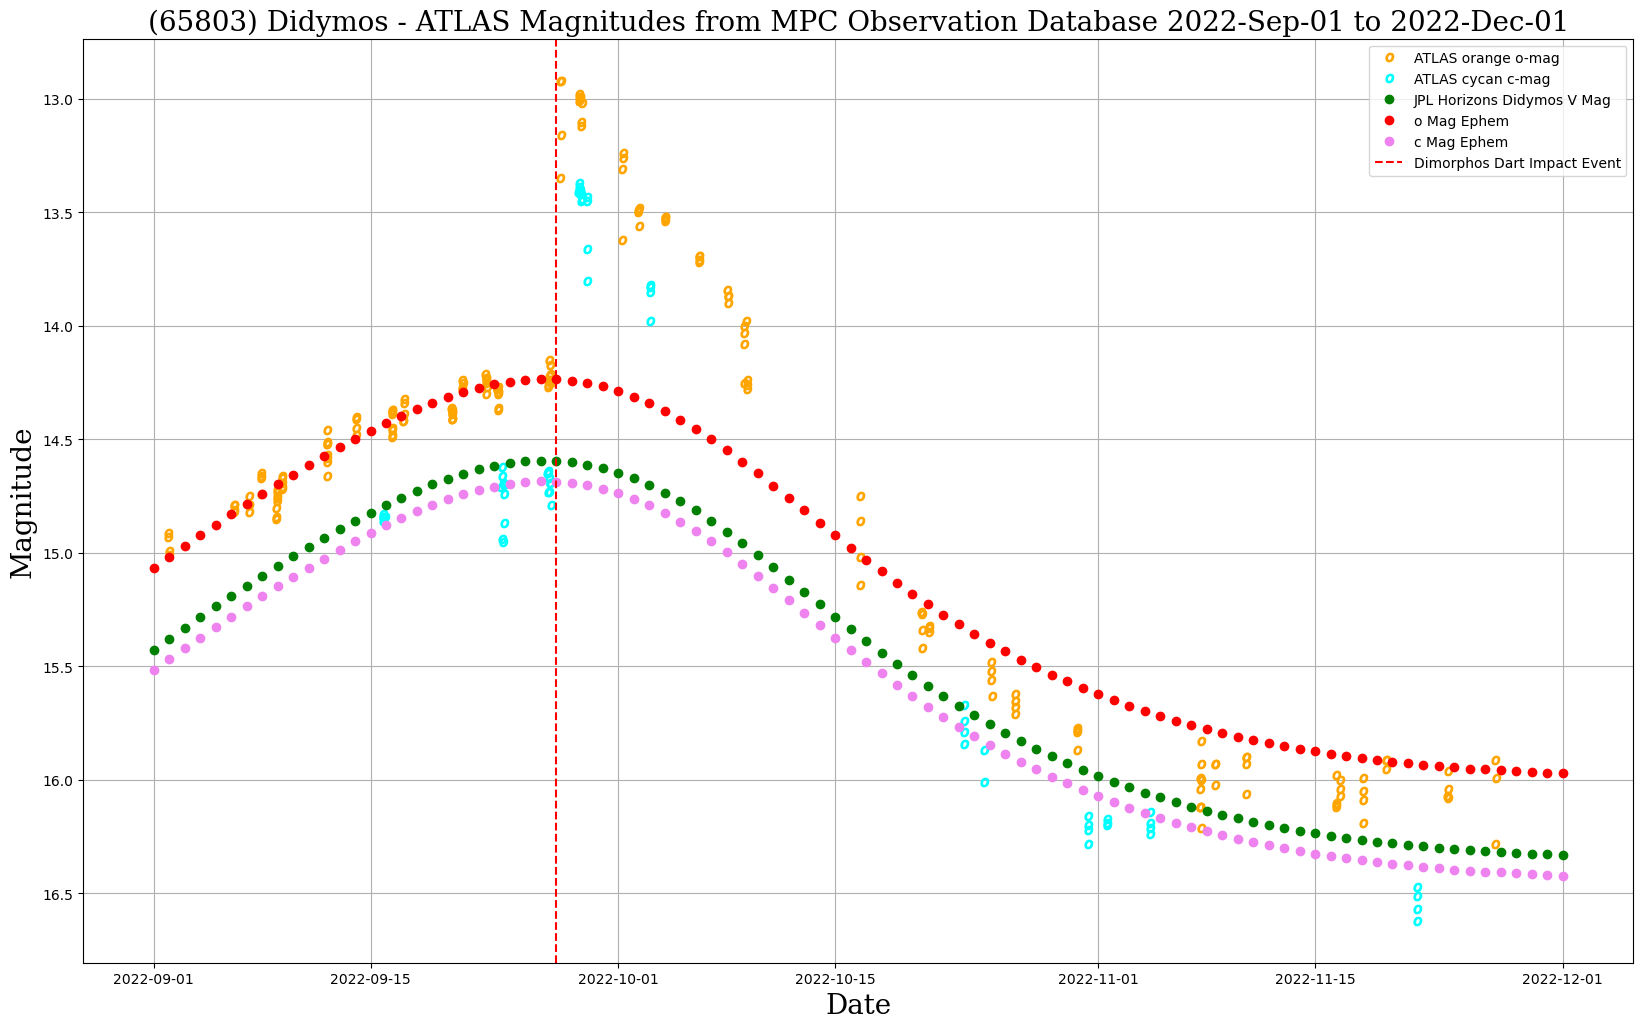

In [20]:
font1 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

boxprops = dict(boxstyle='round', facecolor='#ffffff', ec='#CCCCCC', alpha=0.9)
             
rc('text', usetex=False)
fig, ax = plt.subplots(figsize=(20, 12))

locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.grid()
ax.set_title(title, fontdict=font1)
if (len(Tmags) > 0):
    ax.plot_date(Tmpcdates, Tmags, label='T-mag', color='black', fmt='.', marker='$T$', xdate=True, ydate = False)
if (len(Nmags) > 0):
    ax.plot_date(Nmpcdates, Nmags, label='N-mag', color='grey', fmt='.', marker='$N$', xdate=True, ydate = False)
if (len(rmags) > 0):
    ax.plot_date(rmpcdates, rmags, label='r-mag', fmt='.', marker='$r$', xdate=True, ydate = False)
if (len(Bmags) > 0):
    ax.plot_date(Rmpcdates, Rmags, label='B-mag', color='blue', fmt='.', marker='$B$', xdate=True, ydate = False)
if (len(Rmags) > 0):
    ax.plot_date(Rmpcdates, Rmags, label='R-mag', color='red', fmt='.', marker='$R$', xdate=True, ydate = False)
if (len(gmags) > 0):
    ax.plot_date(gmpcdates, gmags, label='g-mag', fmt='.', marker='$g$', xdate=True, ydate = False)
if (len(Gmags) > 0):
    ax.plot_date(Gmpcdates, Gmags, label='G-mag', fmt='.', marker='$G$', xdate=True, ydate = False)
if (len(Vmags) > 0):
    ax.plot_date(Vmpcdates, Vmags, label='V-mag', color='green', fmt='.', marker='$V$', xdate=True, ydate = False)
if (len(omags) > 0):
    ax.plot_date(ompcdates, omags, label='ATLAS orange o-mag', color='orange', fmt='.', marker='$o$', xdate=True, ydate = False)
if (len(cmags) > 0):
    ax.plot_date(cmpcdates, cmags, label='ATLAS cycan c-mag', color='cyan', fmt='.', marker='$o$', xdate=True, ydate = False)
if (len(Imags) > 0):
    ax.plot_date(Impcdates, Imags, label='I-mag', marker='$I$', fmt='.', xdate=True, ydate = False)
if (len(imags) > 0):
    ax.plot_date(impcdates, imags, label='i-mag', fmt='.', marker='$i$', xdate=True, ydate = False)
if (len(zmags) > 0):
    ax.plot_date(zmpcdates, zmags, label='z-mag', fmt='.', marker='$z$', xdate=True, ydate = False)
if (len(wmags) > 0):
    ax.plot_date(wmpcdates, wmags, label='w-mag', fmt='.', marker='$w$', xdate=True, ydate = False)
if (len(Cmags) > 0):
    ax.plot_date(Cmpcdates, Cmags, label='C-mag', fmt='.', marker='$C$', xdate=True, ydate = False)
    
ax.plot_date(datetimes, magvals, label='JPL Horizons Didymos V Mag', color='green', xdate=True, ydate = False)
ax.plot_date(datetimes, o, label='o Mag Ephem', color='red', xdate=True, ydate = False)
ax.plot_date(datetimes, c, label='c Mag Ephem', color='violet', xdate=True, ydate = False)
plt.axvline(impactDateTime, color='red', label='Dimorphos Dart Impact Event', ls='--')


plt.xlabel('Date', fontdict=font1)
plt.gca().invert_yaxis()
plt.ylabel('Magnitude', fontdict=font1)
ax.legend(loc=0)
plt.savefig(figfile)
plt.show()


In [21]:
print('observedbands', observedbands)


print( 'unknown band mags', len(mags))
print('Nmags', len(Nmags))
print('Tmags', len(Tmags))
print('Bmags', len(Bmags))
print('Rmags', len(Rmags))
print('rmags', len(rmags))
print('gmags', len(gmags))
print('Gmags', len(Gmags))
print('Vmags', len(Vmags))
print('omags', len(omags))
print('cmags', len(cmags))
print('wmags', len(wmags))
print('Imags', len(Imags))
print('imags', len(imags))
print('zmags', len(zmags))
print('wmags', len(wmags))
print('Cmags', len(Cmags))

print('Total number of ground based observations with no reported magnitude', len(nonemags))
nummagobs = len(Nmags) + len(Tmags) + len(Rmags) + len(rmags) + len(gmags) +len(Gmags) + len(Vmags) + len(omags) + len(cmags) + len(wmags) + len(Imags)
print('Number of satellite observations (no reported magnitudes)', satelliteObs)
print('Total number of ground based observations with reported magnitudes', nummagobs)
print('Total number of astrometric observations', numobs)

uniquecodes = np.unique(codes) 
print('uniquecodes', uniquecodes)
# M22  20.81059 0.845564 -0.532612 ATLAS South Africa, Sutherland
# T05 203.74299 0.936235 +0.351547 ATLAS-HKO, Haleakala
# T07 204.42387 0.943290 +0.332467 ATLAS-MLO Auxiliary Camera, Mauna Loa
# T08 204.42395 0.943290 +0.332467 ATLAS-MLO, Mauna Loa
# W68 289.23502 0.862845 -0.504269 ATLAS Chile, Rio Hurtado

print('o or orange band observations span ', ompcdates[0], ' to', ompcdates[-1])
print('c or cyan band observations span ', cmpcdates[0], ' to', cmpcdates[-1])


observedbands ['o', 'c']
unknown band mags 0
Nmags 0
Tmags 0
Bmags 0
Rmags 0
rmags 0
gmags 0
Gmags 0
Vmags 0
omags 191
cmags 61
wmags 0
Imags 0
imags 0
zmags 0
wmags 0
Cmags 0
Total number of ground based observations with no reported magnitude 0
Number of satellite observations (no reported magnitudes) 0
Total number of ground based observations with reported magnitudes 252
Total number of astrometric observations 252
uniquecodes ['M22' 'T05' 'T08' 'W68']
o or orange band observations span  2022-09-01 22:49:49  to 2022-11-26 15:39:36
c or cyan band observations span  2022-09-15 19:08:00  to 2022-11-21 13:53:32


## Plot ephemeris distances and phase which affect the overall brightness

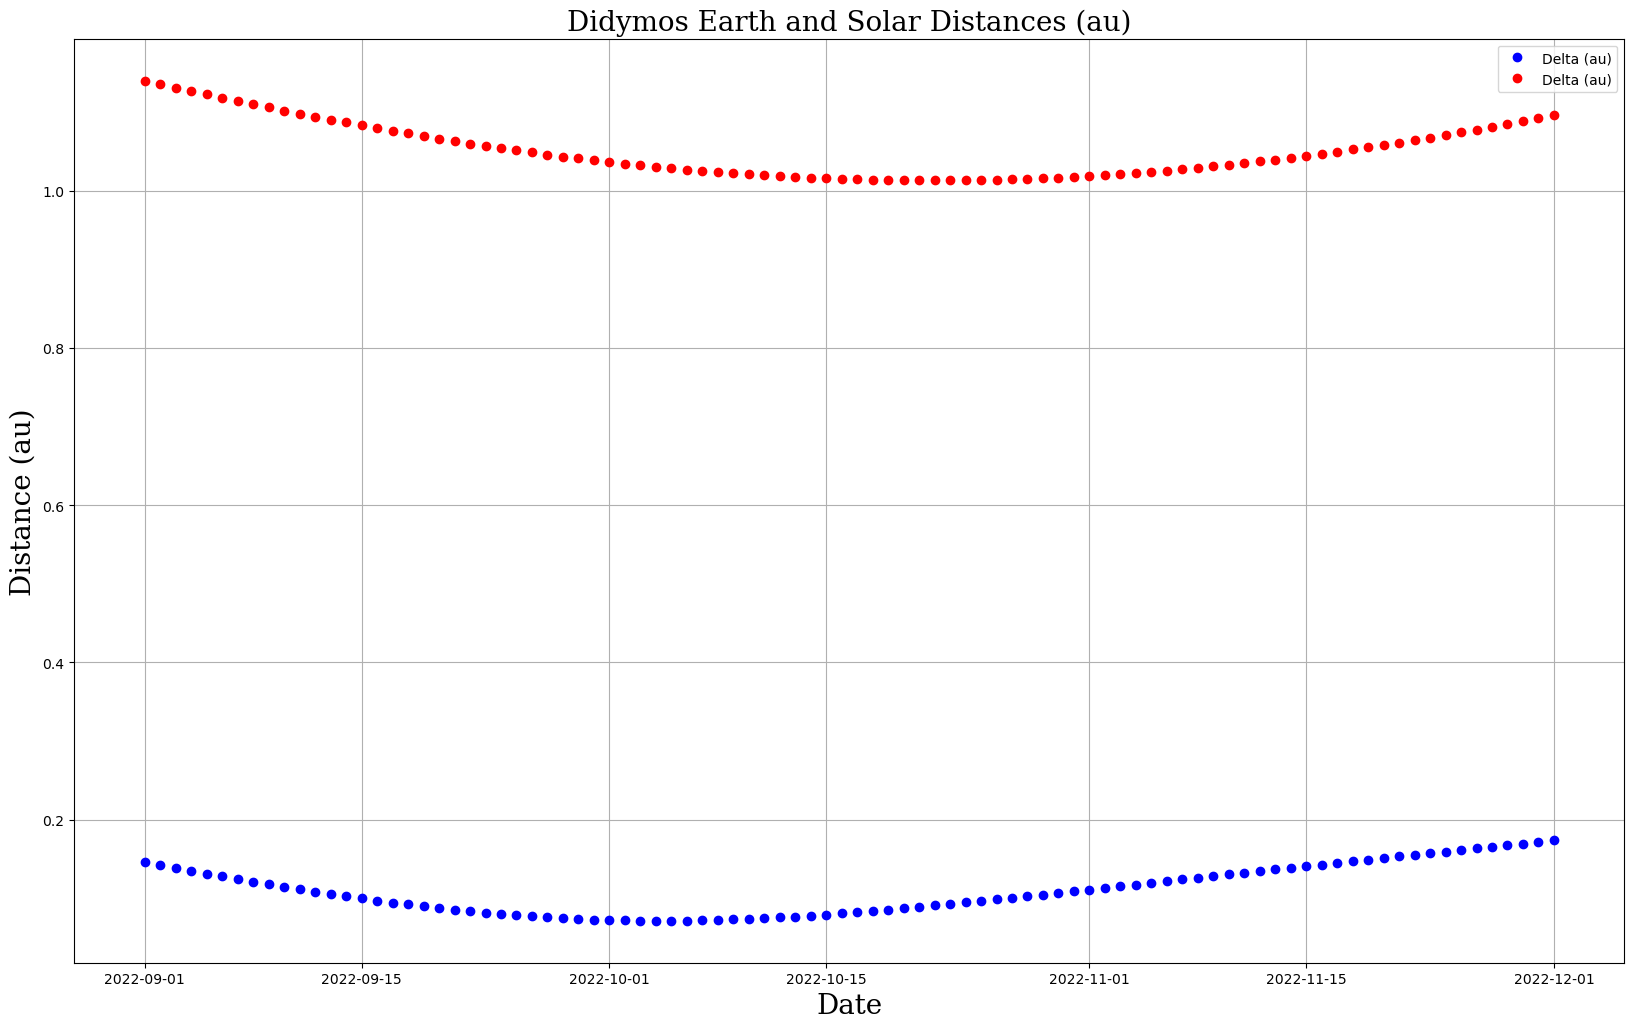

In [22]:
#%%
fig, ax = plt.subplots(figsize=(20, 12))
locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.grid()
ax.set_title('Didymos Earth and Solar Distances (au)', fontdict=font1)
plt.xlabel('Date', fontdict=font1)
plt.ylabel('Distance (au)', fontdict=font1)
ax.plot_date(datetimes, deltavals, label='Delta (au)', color='blue', xdate=True, ydate = False)
ax.plot_date(datetimes, rhvals, label='Delta (au)', color='red', xdate=True, ydate = False)
ax.legend(loc=0)
plt.show()


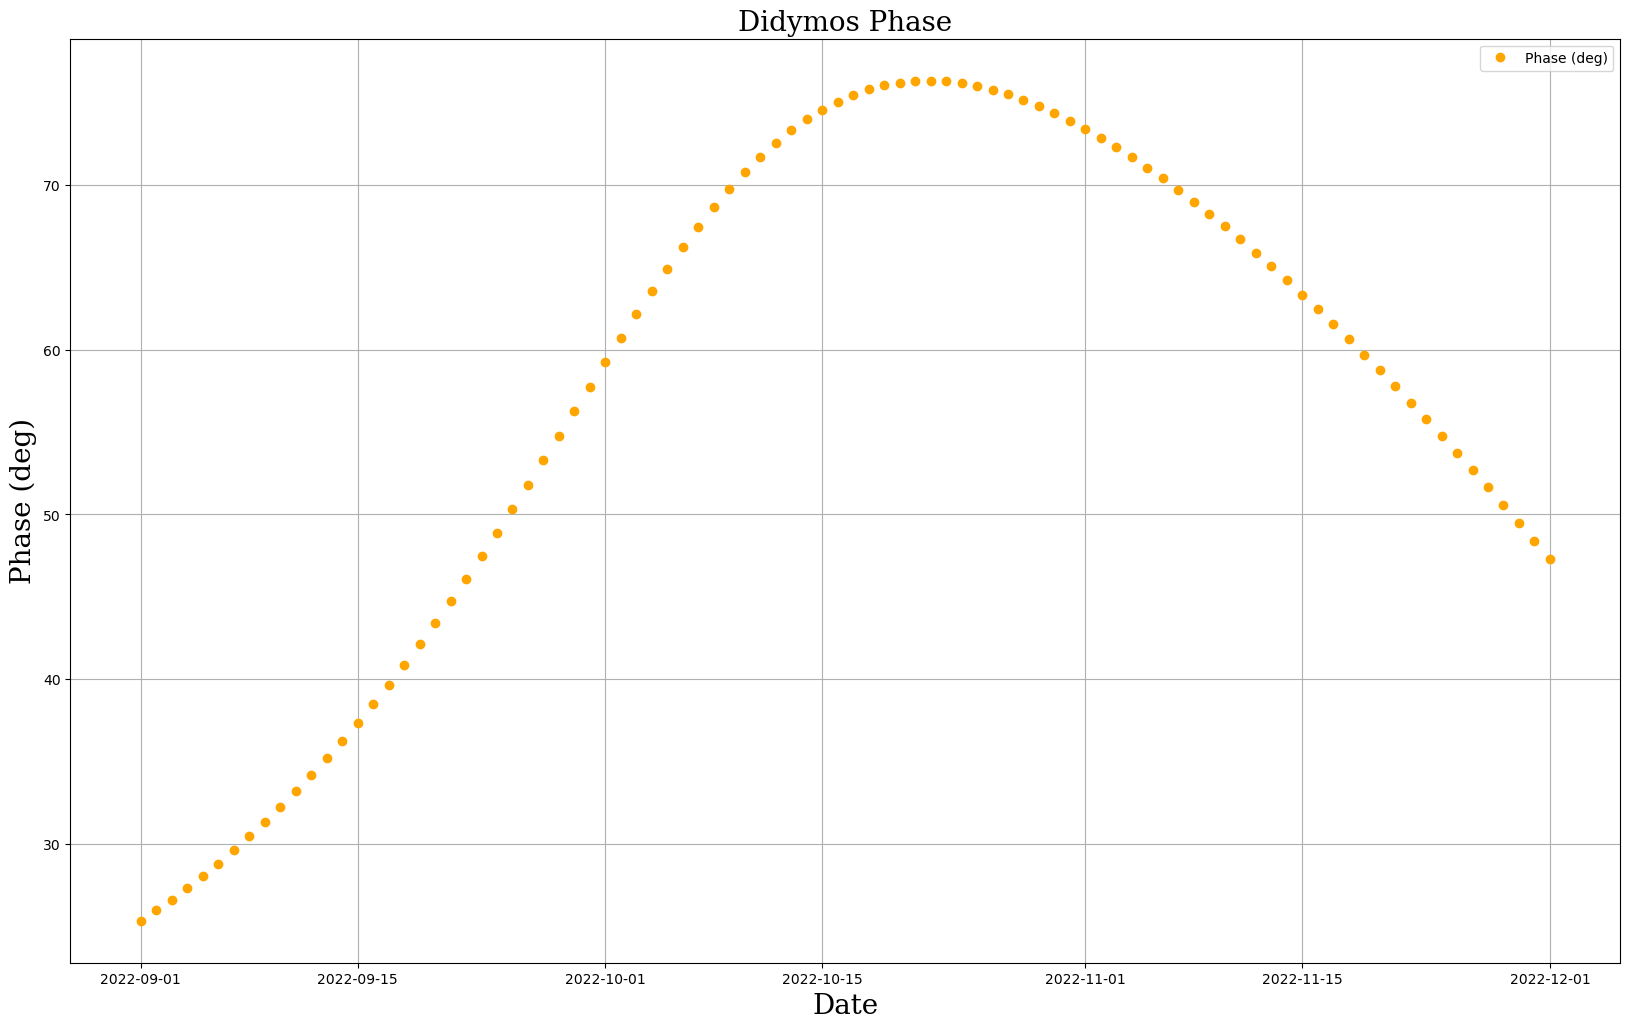

In [23]:
#%%
fig, ax = plt.subplots(figsize=(20, 12))
locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.grid()
ax.set_title('Didymos Phase', fontdict=font1)
plt.xlabel('Date', fontdict=font1)
plt.ylabel('Phase (deg)', fontdict=font1)
ax.plot_date(datetimes, phasevals, label='Phase (deg)', color='orange', xdate=True, ydate = False)
ax.legend(loc=0)
plt.show()
